0.11336992421308277
30.212997495461888 -0.012052189879554939
klas is  0.004
c_out is  0.06823093134667563
c_out is  0.11319986932676315
height is  0.003170734819838238
the new eff is  0.5897881798383449
0.10480187464121846
28.085321615499783 0.5561683437602218
klas is  0.004
c_out is  0.06405139497015644
c_out is  0.10464467182925663
height is  0.002936859962412106
the new eff is  0.7639320095867572
0.09686075552583201
29.361927143477047 0.05934517200963508
klas is  0.004
c_out is  0.05820004404302959
c_out is  0.09671546439254326
height is  0.003067459401896222
the new eff is  0.6089110424316845
0.12413223038261967
42.5535175992421 -0.1930143657262974
klas is  0.004
c_out is  0.08965105527633643
c_out is  0.12394603203704574
height is  0.004456942739736327
the new eff is  0.3575529382489592
0.13323772780029136
25.957645735537678 -0.008665277858628244
klas is  0.004
c_out is  0.07223221809204984
c_out is  0.13303787120859092
height is  0.002721783653549377
the new eff is  0.62717245231

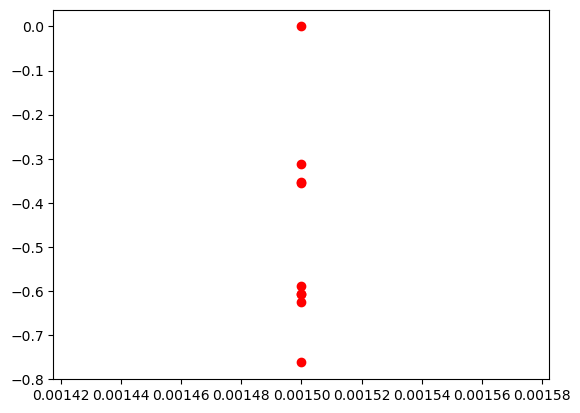

In [1]:

import sys
import os
sys.path.append(os.path.abspath('..'))
from tools.component_tools import GLC,GLC_Gas,Fluid
import numpy as np 
import matplotlib.pyplot as plt
R_const=8.314
T = [673, 673, 673, 673, 713, 713, 713, 713, 713]
Z = 0.6
R = 0.0547/2
Q_l = [
    71.0    * 1e-3 / 3600,
    66      * 1e-3 / 3600,
    69      * 1e-3 / 3600,
    100     * 1e-3 / 3600,
    61      * 1e-3 / 3600,
    68      * 1e-3 / 3600,
    68      * 1e-3 / 3600,
    100     * 1e-3 / 3600,
    70      * 1e-3 / 3600,
]
Q_gas = [
    3 * 1e-3 / 3600,
    6 * 1e-3 / 3600,
    9 * 1e-3 / 3600,
    6 * 1e-3 / 3600,
    3 * 1e-3 / 3600,
    6 * 1e-3 / 3600,
    9 * 1e-3 / 3600,
    6 * 1e-3 / 3600,
    6 * 1e-3 / 3600,
]
p_in = [1085, 1003, 927, 1188, 1258, 1152, 1158, 1228, 2490]
p_out = [653, 613, 557, 858, 682, 670, 612, 712, 1215]
B_vec = []
kl_vec = []
for i in range(len(Q_gas)):
    SweepGas=GLC_Gas(G_gas=Q_gas[i],pg_in=0,p_tot=1.5E5)
    
    Flibe=Fluid(Solubility=1.33E-4*np.exp(-1350/R_const/T[i]),MS=True )
    c_in=p_in[i]*Flibe.Solubility
    print(c_in)
    Melodie=GLC(H=Z,R=R,c_in=p_in[i]*Flibe.Solubility,fluid=Flibe,GLC_gas=SweepGas,T=T[i],G_L=Q_l[i],c_out=p_out[i]*Flibe.Solubility)
    [a,b] = Melodie.get_kla_from_cout()
    print(a, b)
    B_vec.append(a)
    kl_vec.append(b)
    eff=0.0015
    Melodie.kla=4E-3
    print("klas is ",Melodie.kla)
    print("c_out is ",Melodie.c_out)    
    Melodie.update_attribute("c_out",Melodie.c_in*(1-eff))
    print("c_out is ",Melodie.c_out)
    height=Melodie.get_z_from_eff()
    print("height is ",height)
    Melodie.update_attribute("H",height)
    Melodie.get_c_out()
    print("the new eff is ",Melodie.eff)
    err2=eff-Melodie.eff
    plt.scatter(eff,err2,color='red')    


if done correctly the results should be the same as this table
| B         | kla$$10^3$$    |
|-----------|----------------|
| 30.2      | 4.87           |
| 28.0      | 3.92           |
| 29.4      | 4.13           |
| 42.6      | 3.88           |
| 26.0      | 5.06           |
| 28.9      | 4.50           |
| 28.9      | 5.16           |
| 42.6      | 6.99           |
| 29.8      | 6.12           |
| 28.2      | 2.84           |
| 14.1      | 2.12           |
| 14.1      | 1.90           |
| 14.1      | 1.66           |
| 14.1      | 1.73           |



height is  0.2888840668133615
eff_res is  0.09999830058495224
err is  -1.6994150477678271e-06
height is  0.34070701683059196
eff_res is  0.11110898365134711
err is  -2.1274597640091875e-06
height is  0.4002188894829455
eff_res is  0.12221957062507559
err is  -2.6515971466439803e-06
height is  0.4698272768171663
eff_res is  0.13333004647224103
err is  -3.2868610922998087e-06
height is  0.553270130338745
eff_res is  0.14444012222893005
err is  -4.322215514412919e-06
height is  0.656818189599879
eff_res is  0.15554951751305857
err is  -6.038042496991913e-06
height is  0.7922287708519705
eff_res is  0.16665550787174965
err is  -1.11587949170322e-05
height is  0.9857134892010625
eff_res is  0.1777421464228147
err is  -3.5631354963094886e-05
height is  1.3167137361854495
eff_res is  0.18869528855447912
err is  -0.00019360033440976587
height is  2.2840731157687637
eff_res is  0.1982348614381341
err is  -0.0017651385618659143
height is  0.11943559093910948
eff_res is  0.09999922856026208
err i

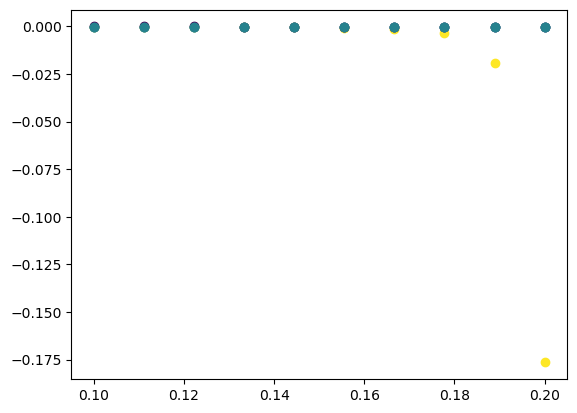

In [2]:
# reset notebook
%reset -f
from math import e, nan
from pyexpat import model

from sympy import Q
from tools.component_tools import GLC,GLC_Gas,Fluid
import numpy as np 
import matplotlib.pyplot as plt
import mph 
R_const=8.31
T = [673, 673, 673, 673, 673]
Z = 0.8
R = 0.03
Q_l = np.array([
    80.0 * 1e-3 / 3600,
    40   * 1e-3 / 3600,
    40   * 1e-3 / 3600,
    40   * 1e-3 / 3600,
    40   * 1e-3 / 3600,
])
Q_gas = np.array([
    6 * 1e-3 / 3600,
    6 * 1e-3 / 3600,
    30 * 1e-3 / 3600,
    6 * 1e-3 / 3600,
    6 * 1e-3 / 3600,
])
L_on_g=Q_l/Q_gas
p_in = [1275, 1050, 988, 463, 225]
p_out = [796, 515, 484, 267, 130]
B_vec = []
kl_vec = []
client=mph.start()
model = client.load('GenericMSGLC.mph')
for i in range(len(Q_gas)):
    SweepGas=GLC_Gas(G_gas=Q_gas[i],pg_in=0,p_tot=1.5E5)
    Flibe=Fluid(Solubility=1.33E-4*np.exp(-1350/R_const/T[i]),MS=True )
    c_in=p_in[i]*Flibe.Solubility
    Melodie=GLC(H=Z,R=R,c_in=p_in[i]*Flibe.Solubility,fluid=Flibe,GLC_gas=SweepGas,T=T[i],G_L=Q_l[i],c_out=p_out[i]*Flibe.Solubility,kla=4E-3)
    # [a,b] = Melodie.get_kla_from_cout()
    # print(a, b)
    # B_vec.append(a)
    # kl_vec.append(b)
    eff_v=np.linspace(0.1,0.2,10)
    # eff_v=np.array([1-Melodie.c_out/Melodie.c_in])
    height_v=[]
    err_v=[]
    norm = plt.Normalize(min(Q_l/Q_gas), max(Q_l/Q_gas))
    # Melodie.kla=1E-4
    for eff in eff_v:
        Melodie.c_out=Melodie.c_in*(1-eff)
        # Melodie.GLC_gas.update_attribute("p_out",Melodie.c_out/Flibe.Solubility)
        height=Melodie.get_z_from_eff()
        print("height is ",height)
        c_PbLi=56182
        height_v.append(height)
        flag_coms=1
        if isinstance(height,float) and flag_coms!=0:
            # model.parameter("H",height)
            model.parameter("H",height)
            model.parameter("Ls",Q_l[i]*c_PbLi)
            model.parameter("Vs",Q_gas[i])
            model.parameter("R",R)
            model.parameter("K_H",Melodie.fluid.Solubility)
            model.parameter("Kl_a",Melodie.kla)
            model.parameter("c2_in",1E-10)
            model.parameter("c_in",c_in)
            model.save()
            model.solve()
            eff_coms=model.evaluate("eff")
            eff_res=eff_coms
            err=eff_res-eff
            print("eff_res is ",eff_res)
            print("err is ",err)    
            err_v.append(err)
            plt.scatter( eff,err*100, c=Q_l[i]/Q_gas[i], cmap='viridis', norm=norm)
        

height is  0.31912343525789433
eff_res is  0.0999945442672664
err is  -5.455732733611329e-06
height is  0.45003660026340386
eff_res is  0.12221492718653085
err is  -7.295035691384788e-06
height is  0.6413990241775516
eff_res is  0.14443409167111892
err is  -1.0352773325505993e-05
height is  0.9854327086906677
eff_res is  0.16662739358722645
err is  -3.9273079440210745e-05
height is  2.632238997412854
eff_res is  0.186577553752053
err is  -0.0023113351368358737
height is  1.3365660567610533
eff_res is  0.17732531824134593
err is  -0.033785792869765185
height is  None
height is  None
height is  1.1043849179916034
eff_res is  0.1711699847299264
err is  -0.1066077930478514
height is  4.451884765325317
eff_res is  0.18726119622491835
err is  -0.11273880377508164
height is  0.12703266996266122
eff_res is  0.09999638976194142
err is  -3.6102380585878446e-06
height is  0.16380215689234714
eff_res is  0.12221757820150447
err is  -4.644020717758934e-06
height is  0.20497992244959623
eff_res is  

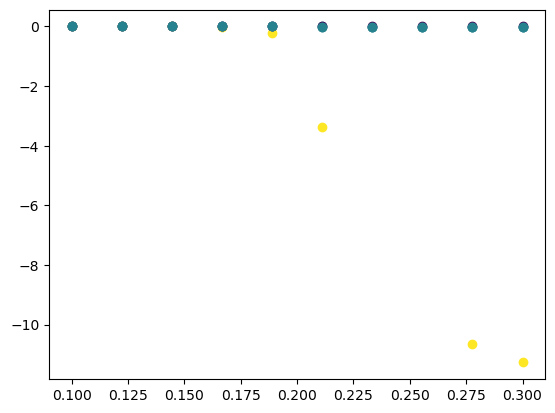

In [3]:
# reset notebook
%reset -f
from math import e, nan
from pyexpat import model

from sympy import Q
from tools.component_tools import GLC,GLC_Gas,Fluid
import numpy as np 
import matplotlib.pyplot as plt
import mph 
R_const=8.31
T = [673, 673, 673, 673, 673]
Z = 0.8
R = 0.03
Q_l = np.array([
    80.0 * 1e-3 / 3600,
    40   * 1e-3 / 3600,
    40   * 1e-3 / 3600,
    40   * 1e-3 / 3600,
    40   * 1e-3 / 3600,
])
Q_gas = np.array([
    6 * 1e-3 / 3600,
    6 * 1e-3 / 3600,
    30 * 1e-3 / 3600,
    6 * 1e-3 / 3600,
    6 * 1e-3 / 3600,
])
L_on_g=Q_l/Q_gas
p_in = [1275, 1050, 988, 463, 225]
p_out = [796, 515, 484, 267, 130]
B_vec = []
kl_vec = []
client=mph.start()
model = client.load('GenericMSGLC.mph')
for i in range(len(Q_gas)):
    SweepGas=GLC_Gas(G_gas=Q_gas[i],pg_in=0,p_tot=1.5E5)
    Flibe=Fluid(Solubility=1.33E-4*np.exp(-1350/R_const/T[i]),MS=True )
    c_in=p_in[i]*Flibe.Solubility
    Melodie=GLC(H=Z,R=R,c_in=p_in[i]*Flibe.Solubility,fluid=Flibe,GLC_gas=SweepGas,T=T[i],G_L=Q_l[i],c_out=p_out[i]*Flibe.Solubility,kla=4E-3)
    # [a,b] = Melodie.get_kla_from_cout()
    # print(a, b)
    # B_vec.append(a)
    # kl_vec.append(b)
    eff_v=np.linspace(0.1,0.3,10)
    # eff_v=np.array([1-Melodie.c_out/Melodie.c_in])
    height_v=[]
    err_v=[]
    norm = plt.Normalize(min(Q_l/Q_gas), max(Q_l/Q_gas))
    # Melodie.kla=1E-4
    for eff in eff_v:
        Melodie.c_out=Melodie.c_in*(1-eff)
        Melodie.GLC_gas.update_attribute("pg_in",p_out[i]/10)
        # Melodie.GLC_gas.update_attribute("p_out",Melodie.c_out/Flibe.Solubility)
        height=Melodie.get_z_from_eff()
        print("height is ",height)
        c_PbLi=56182
        height_v.append(height)
        flag_coms=1
        if isinstance(height,float) and flag_coms!=0:
            # model.parameter("H",height)
            model.parameter("H",height)
            model.parameter("Ls",Q_l[i]*c_PbLi)
            model.parameter("Vs",Q_gas[i])
            model.parameter("R",R)
            model.parameter("K_H",Melodie.fluid.Solubility)
            model.parameter("c2_in",Melodie.GLC_gas.pg_in/R_const/T[i])
            model.parameter("Kl_a",Melodie.kla)
            model.parameter("c_in",c_in)
            # model.save()
            model.solve()
            eff_coms=model.evaluate("eff")
            eff_res=eff_coms
            err=eff_res-eff
            print("eff_res is ",eff_res)
            print("err is ",err)    
            err_v.append(err)
            plt.scatter( eff,err*100, c=Q_l[i]/Q_gas[i], cmap='viridis', norm=norm)
        

In [4]:


Melodie.GLC_gas.inspect()
# model.save()


G_gas: 1.6666666666666667e-06
pg_in: 13.0
p_tot: 150000.0
pg_out: 0


In [5]:
Melodie.inspect()

c_in: 0.023507161926676547
eff: None
fluid is a <class 'tools.component_tools.Fluid'> class, printing its variables:
    T: None
    MS: True
    D: None
    Solubility: 0.00010447627522967355
    k_t: None
    d_Hyd: None
    mu: None
    rho: None
    recirculation: 0
    U0: None
    k: None
    cp: None
    inv: None
H: 0.8
R: 0.03
L: None
G_L: 1.1111111111111112e-05
T: 673
GLC_gas: <tools.component_tools.GLC_Gas object at 0x00000241722C0B10>
c_out: 0.01645501334867358
kla: 0.004
